**Chapter 08**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 7

In [4]:
from sklearn.ensemble import RandomForestRegressor
boston_file_name ='../data/Boston.csv'
bostons = pd.read_csv(boston_file_name, index_col=0)
bostons.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
bostons.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [6]:
X = bostons[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].values
y = bostons['crim'].values
clf1 = RandomForestRegressor(n_estimators=25,max_features='sqrt')
clf1.fit(X,y)
print(clf1.score(X,y))

0.915251068291


In [7]:
clf2 = RandomForestRegressor(n_estimators=500,max_features='sqrt')
clf2.fit(X,y)
print(clf2.score(X,y))

0.938260147606


# 8

In [8]:
carseats_file_name = '../data/Carseats.csv'
carseats = pd.read_csv(carseats_file_name, index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
sales_mean = np.mean(carseats['Sales'].values)
carseats['SaleStatus'] = ['Good' if sale > sales_mean else 'Bad' for sale in carseats['Sales']]
carseats=carseats.replace(['Yes','No'],[1,-1])

## 8(a)

In [19]:
X = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']].values
y = carseats['SaleStatus'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## 8(b)

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
tree.score(X_test, y_test)

0.74375000000000002

## 8(c)

In [28]:
from sklearn.ensemble import BaggingClassifier
clf = DecisionTreeClassifier()
bagging = BaggingClassifier(clf, n_estimators=100)
bagging.fit(X_train, y_train)
bagging.score(X_test, y_test)

0.71250000000000002

# 9

In [32]:
oj_file_name = '../data/OJ.csv'
ojs = pd.read_csv(oj_file_name, index_col=0)
print(ojs.shape)
ojs.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## 9(a)

In [33]:
X = ojs[['WeekofPurchase','PriceCH','PriceMM','DiscCH','DiscMM',
         'SpecialCH','SpecialMM','LoyalCH','SalePriceMM','SalePriceCH',
         'PriceDiff','PctDiscMM','PctDiscCH','ListPriceDiff']].values
y = ojs['Purchase'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=270/1070, random_state=0)

## 9(b)

In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.98875000000000002

## 9(e)

In [36]:
tree.score(X_test, y_test)

0.74814814814814812

In [38]:
pred = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[119,  34],
       [ 34,  83]])

## 9(f,g,h)

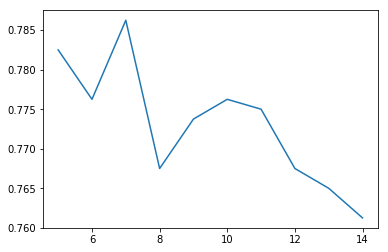

In [39]:
from sklearn.model_selection import cross_val_score
def scores_by_tree_depth(depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf,X_train, y_train, cv=5)
    return scores.mean()

depthes = range(5,15)
scores = []
for depth in depthes:
    scores.append(scores_by_tree_depth(depth))
plt.plot(depthes, scores)
plt.show()

when the tree's max-depth is 7, it has highest scores.

## 7(k)

In [40]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.77777777777777779

# 8

In [41]:
hitters_file_name = '../data/Hitters.csv'
hitters = pd.read_csv(hitters_file_name, index_col=0)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [42]:
hitters = hitters.dropna()
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
